# Quantum Entanglement
<hr></hr>

Entanglement is one of the key components that makes quantum computing different from traditional digital systems. As a matter of fact, entanglement might be the main ingredient that allows quantum devices to provide a computational advantage over their classical counterparts. To understand entanglement, we will follow a similar approach to that of the previous chapter and explain how this phenomenon emerges from a physical setup, like for example a system composed by the spin of two separate electrons.

We will then explore how this effect is mapped to the qubit representation in an abstract quantum circuit model, which will be vital step in the construction of quantum algorithms.

## 1. Two-Electron System

### 1.1 Separable Electrons
In the previous chapter we described how the spin of a single electron can be seen as one of many physical representations of a qubit. Now, to treat a system in which we have two electrons (i.e. qubits), we follow the same rules we introduced for [multi-bit reversible-circuit systems](../01_classical_computing/01_03_bits_to_vectors.ipynb#2.1-Multi-Bit-Numbers-as-Vectors). Namely, we use the tensor product of the two separate states. So, given two separate electrons/qubits $q_0$, $q_1$, the statevector that represents the entire system is given by:

$$|q\rangle = |q_0\rangle \otimes |q_1\rangle$$

So, if both electrons have their spin pointing in the $\texttt{+}z$ direction (qubits are in state $|0\rangle$), we have the state:

$$
\begin{aligned}
|q\rangle &= |0\rangle \otimes |0\rangle
\\
\\
|q\rangle &= \begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\end{aligned}
$$

And we can follow the same procedure if the electrons have their spin pointing in, for example, the $\texttt{+}x$ and $\texttt{-}x$ directions, respectively:

$$
\begin{aligned}
|q\rangle &= |+\rangle \otimes |-\rangle
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}}\begin{bmatrix} 1 \\ 1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}}\begin{bmatrix} \phantom{-}1 \\ -1 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2}\begin{bmatrix} \phantom{-}1 \\ -1 \\ \phantom{-}1 \\ -1 \end{bmatrix}
\end{aligned}
$$

Now, let's recall that we can also express this vector as a linear combination (a **superposition**) of terms as follows:

$$
\begin{aligned}
|q\rangle &= |+\rangle \otimes |-\rangle
\\
\\
|q\rangle &= \frac{1}{\sqrt{2}}\left(|0\rangle + |1\rangle \right) \otimes \frac{1}{\sqrt{2}}\left(|0\rangle - |1\rangle \right)
\\
\\
|q\rangle &= \frac{1}{2}\left(|0\rangle \otimes |0\rangle  - |0\rangle \otimes |1\rangle + |1\rangle \otimes |0\rangle - |1\rangle \otimes |1\rangle \right) 
\end{aligned}
$$

It is common notation to shorten states of the form $|q_0\rangle \otimes |q_1\rangle $ as $|q_0 q_1\rangle $, so we can rewrite the expression above more succinctly as:

$$ |q\rangle = \frac{1}{2}\left(|00\rangle  - |01\rangle + |10\rangle - |11\rangle \right) $$

So, what we have is that, when two separate electrons/qubits are independently in superposition, the state that represents the total system corresponds to a superposition of four terms. Same holds true for the other different combinations of $|+\rangle$ and $|-\rangle$, but with different signs in the summation terms. We can actually show what these statevectors look like using Qiskit:

In [1]:
import numpy as np
from qiskit.quantum_info import Statevector

plus = Statevector.from_label('+')
minus = Statevector.from_label('-')

q_pp = plus.tensor(plus)
q_pm = plus.tensor(minus)
q_mp = minus.tensor(plus)
q_mm = minus.tensor(minus)

display(q_pp.draw('latex', prefix='|++\\rangle = '))
display(q_pm.draw('latex', prefix='|+-\\rangle = '))
display(q_mp.draw('latex', prefix='|-+\\rangle = '))
display(q_mm.draw('latex', prefix='|--\\rangle = '))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In the example above, we explicitly applied the Kronecker product using the `tensor` method of the `Statevector` objects, but we know that we can also arrive to the same statevector using a quantum circuit where we just represent each electron with a line to which we can apply gates as discussed before for a single electron.

For example, to prepare state $|+-\rangle$ assuming we start with state $|00\rangle$, we need to first apply an $X$ gate to $q_0$ to get state $|01\rangle$, and then Hadamard gates to both qubits. Let's work out the math for this, and then implement the circuit in Qiskit:

$$ 
\begin{aligned}
|q\rangle &= (H \otimes H) (I \otimes X) |00\rangle
\\
\\
|q\rangle &= \left(\frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \otimes \frac{1}{\sqrt{2}} \begin{bmatrix} 1 & \phantom{-}1 \\ 1 & -1 \end{bmatrix} \right) \left(\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix} \otimes \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix} \right) \left(\begin{bmatrix} 1 \\ 0 \end{bmatrix} \otimes \begin{bmatrix} 1 \\ 0 \end{bmatrix} \right)
\\
\\
|q\rangle &= \frac{1}{2} \begin{bmatrix}1 & \phantom{-}1 & \phantom{-}1 & \phantom{-}1\\1 & -1 & \phantom{-}1 & -1\\1 & \phantom{-}1 & -1 & -1\\1 & -1 & -1 & \phantom{-}1\end{bmatrix} \begin{bmatrix}0 & 1 & 0 & 0\\1 & 0 & 0 & 0\\0 & 0 & 0 & 1\\0 & 0 & 1 & 0\end{bmatrix} \begin{bmatrix} 1 \\ 0 \\ 0 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2} \begin{bmatrix}1 & \phantom{-}1 & \phantom{-}1 & \phantom{-}1\\1 & -1 & \phantom{-}1 & -1\\1 & \phantom{-}1 & -1 & -1\\1 & -1 & -1 & \phantom{-}1\end{bmatrix}\begin{bmatrix} 0 \\ 1 \\ 0 \\ 0 \end{bmatrix}
\\
\\
|q\rangle &= \frac{1}{2} \begin{bmatrix} \phantom{-}1 \\ -1 \\ \phantom{-}1 \\ -1 \end{bmatrix}
\end{aligned}
$$

As we can see, this is the same vector we had derived above for state $|+-\rangle$. Now let's implement the circuit in Qiskit and look at the statevector at the output (recall that in Qiskit all qubits are initialized to $|0\rangle$ by default):

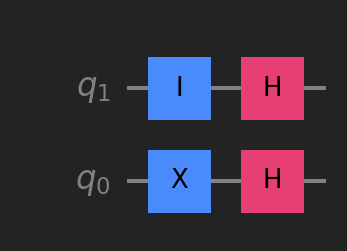

Statevector in ket notation: 


<IPython.core.display.Latex object>

Statevector in vector notation: 


<IPython.core.display.Latex object>

In [23]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)  # create quantum circuit with 2 qubits
qc.x(0)                 # apply X gate to qubit 0
qc.id(1)                # apply identity to qubit 1
qc.h([0,1])             # apply H gate to qubits 0 and 1
display(qc.draw())

sv = Statevector(qc)
print('Statevector in ket notation: ')
display(sv.draw('latex', prefix='|q\\rangle = '))
print('Statevector in vector notation: ')
display(sv.draw('latex', prefix='|q\\rangle = ', convention='vector'))